# Pandas DataSeries

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
tickers = ["AAPL","TSLA","MSFT","AMZN"]
start = "2019-01-01"
end = "2020-01-01"
freq = "d"

In [3]:
def Download_data(tickers, start, end, freq):
    data = web.YahooDailyReader(symbols=tickers,start =  start,end =  end, interval = freq).read()
    Adj_close = data["Adj Close"]
    return Adj_close

In [4]:
data = Download_data(tickers, start, end, freq)

In [5]:
data.head()

Symbols           AAPL        TSLA        MSFT         AMZN
Date                                                       
2019-01-02  155.582367  310.119995   99.646614  1539.130005
2019-01-03  140.085220  300.359985   95.980820  1500.280029
2019-01-04  146.065353  317.690002  100.444817  1575.390015
2019-01-07  145.740265  334.959991  100.572922  1629.510010
2019-01-08  148.518509  335.350006  101.302139  1656.579956

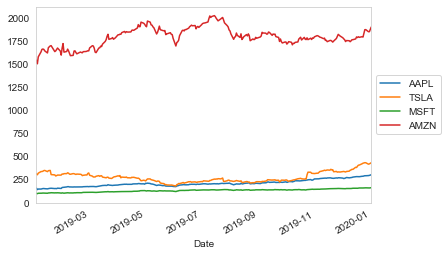

In [6]:
data.plot(kind="line")
plt.grid()
plt.legend(loc = "center left", bbox_to_anchor = (1.0,0.5))
plt.show()

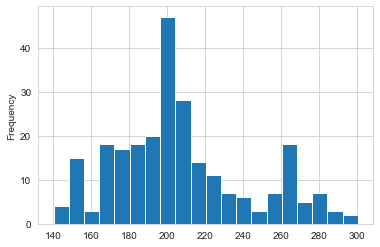

In [7]:
data.iloc[:,0].plot(kind="hist",bins = 20)
plt.show()

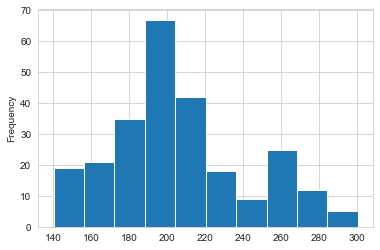

In [8]:
data.iloc[:,0].plot.hist()
plt.show()

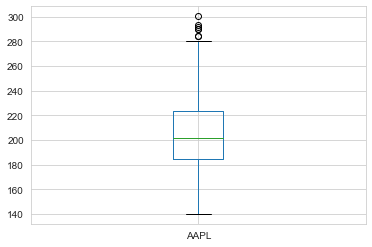

In [9]:
data.iloc[:,0].plot.box()
plt.show()

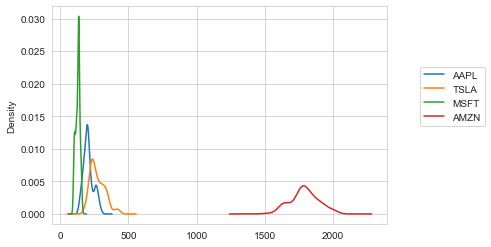

In [10]:
data.plot.kde()
plt.legend(loc = (1.1,.45))
plt.show()

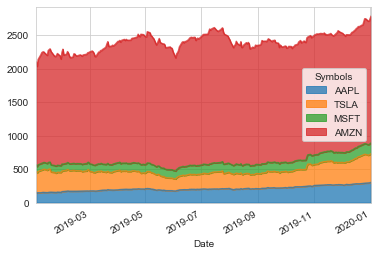

In [11]:
data.plot.area(alpha = .75)

plt.show()

In [12]:
df1 = pd.DataFrame(np.random.randn(10,4),columns = ["A", "B","C","D"])
df1

A         B         C         D
0  1.410670  0.837613  0.122893  0.051398
1  0.450554  1.918528  0.917441  0.692100
2  0.925689  0.887390  1.027822 -1.306202
3  0.685402 -0.000330  2.501879 -0.007776
4  0.286602  1.796243  1.559016  1.347802
5 -0.147124  1.189547  1.233267  0.465024
6  0.599786  0.802043 -0.620686 -0.270371
7 -0.128686  1.068047 -0.820349 -0.173918
8  1.581520  0.574938  0.743957  2.714860
9 -0.321644  0.783728  0.447294 -0.617930

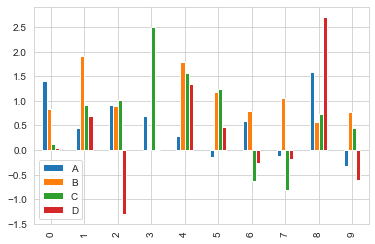

In [13]:
df1.plot.bar()
plt.show()

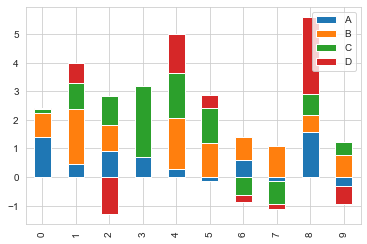

In [14]:
df1.plot.bar(stacked= True)
plt.show()

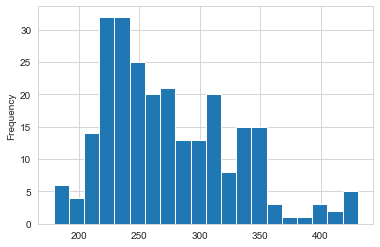

In [15]:
data["TSLA"].plot.hist(bins=20)
plt.show()

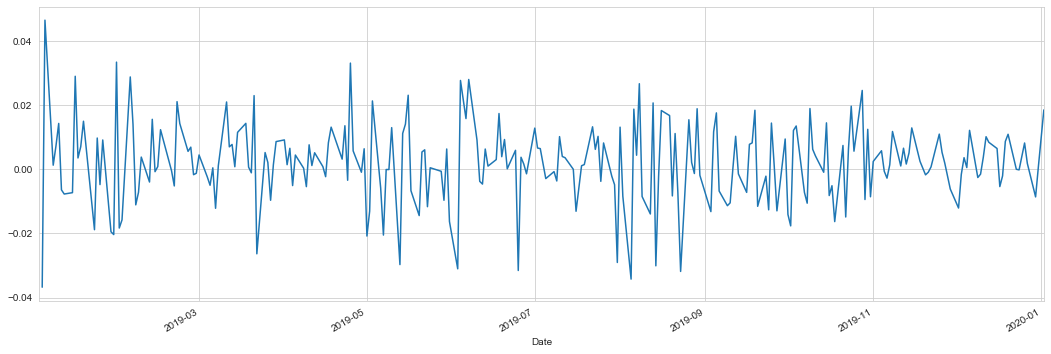

In [16]:
data["MSFT"].pct_change().plot.line(figsize = (18,6))

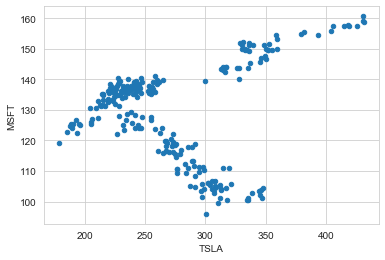

In [17]:
data.plot.scatter(x = "TSLA", y = "MSFT")
plt.show()

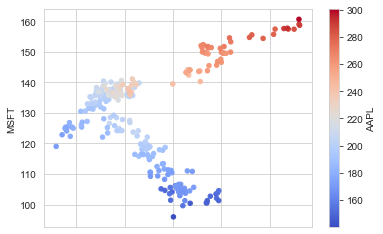

In [18]:
data.plot.scatter(x = "TSLA", y = "MSFT",c = "AAPL",cmap = "coolwarm")
plt.show()

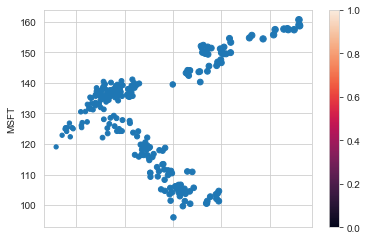

In [19]:
data.plot.scatter(x = "TSLA", y = "MSFT",s = data["TSLA"]*.1, cmap = "coolwarm")
plt.show()

In [20]:
df = pd.DataFrame(np.random.randn(1000,2),columns = ["A","B"])

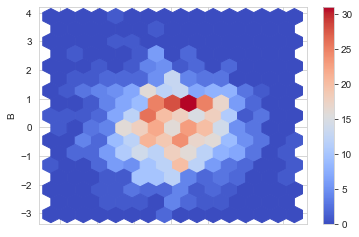

In [21]:
df.plot.hexbin("A", "B", gridsize = 15,CMAP="coolwarm");plt.show() # Concentrated Values

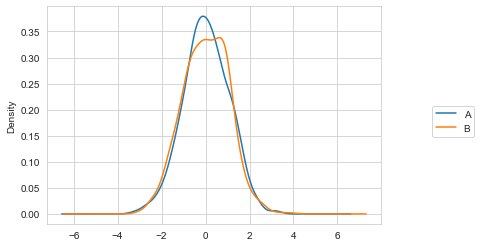

In [22]:
df.plot.kde()
plt.legend(loc = (1.15,.40));plt.show() 


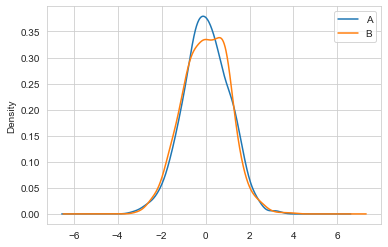

In [23]:
df.plot.density();plt.show() 

# Pandas Time

In [24]:
data.to_csv("Stocks.csv")

In [25]:
data = pd.read_csv("Stocks.csv", index_col = "Date", parse_dates = True)

In [26]:
data

AAPL        TSLA        MSFT         AMZN
Date                                                       
2019-01-02  155.582367  310.119995   99.646614  1539.130005
2019-01-03  140.085220  300.359985   95.980820  1500.280029
2019-01-04  146.065353  317.690002  100.444817  1575.390015
2019-01-07  145.740265  334.959991  100.572922  1629.510010
2019-01-08  148.518509  335.350006  101.302139  1656.579956
...                ...         ...         ...          ...
2019-12-26  289.910004  430.940002  158.669998  1868.770020
2019-12-27  289.799988  430.380005  158.960007  1869.800049
2019-12-30  291.519989  414.700012  157.589996  1846.890015
2019-12-31  293.649994  418.329987  157.699997  1847.839966
2020-01-02  300.350006  430.260010  160.619995  1898.010010

[253 rows x 4 columns]

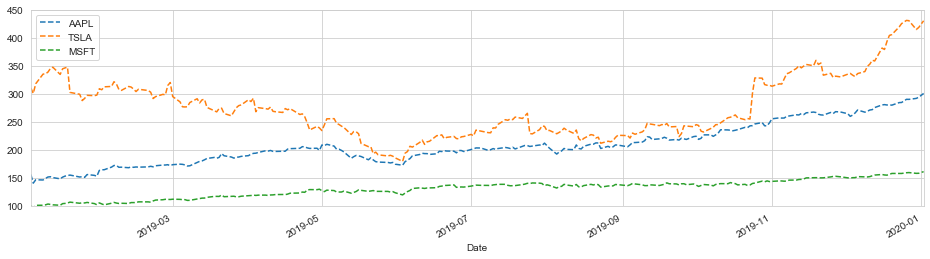

In [27]:
data.iloc[:,:3].plot(figsize = (16,4), ylim = (100,450), ls="--")

In [28]:
import matplotlib.dates as dates

In [29]:
index = data.index

<IPython.core.display.Javascript object>


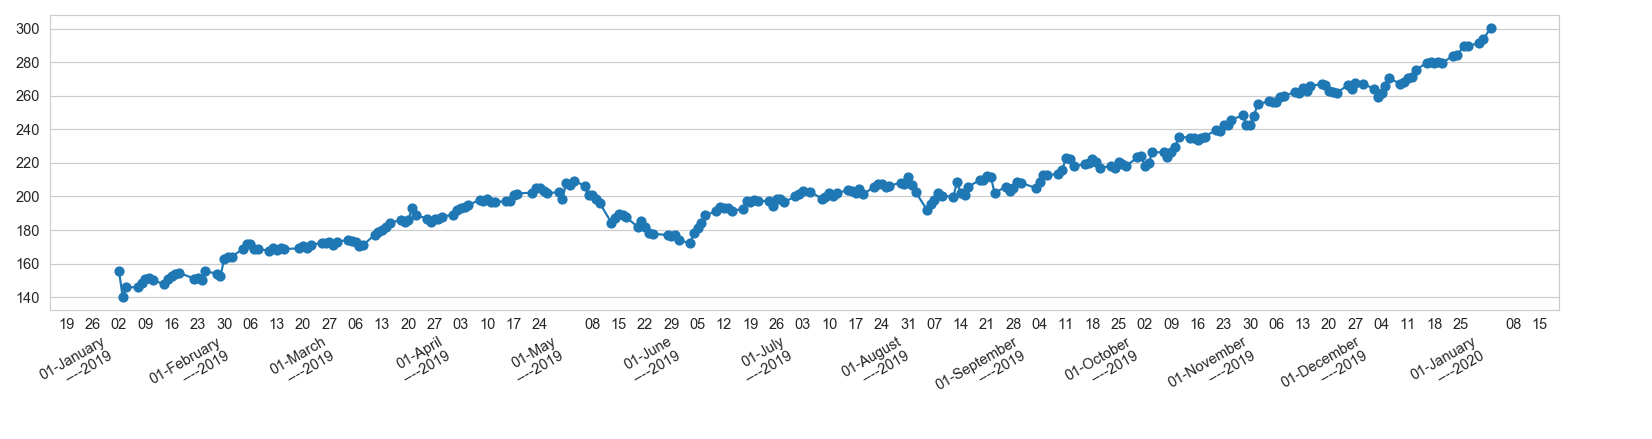

In [30]:
%matplotlib notebook
fig, ax = plt.subplots()
fig.set_size_inches(15,4)
ax.plot_date(index, data.iloc[:,0], ls="-")
ax.xaxis.grid(False)
fig.autofmt_xdate()

# Locating
ax.xaxis.set_major_locator(dates.MonthLocator(bymonthday=1 ,interval = 1)) # Poner meses 
# Formating
ax.xaxis.set_major_formatter(dates.DateFormatter("\n%d-%B\n----%Y"))
# Locating
ax.xaxis.set_minor_locator(dates.WeekdayLocator(2)) # Day you want,2 = Tuesday
# Formating
ax.xaxis.set_minor_formatter(dates.DateFormatter("%d"))

plt.tight_layout()

